RATHLAVATH RAKESH   
20K45A0222

# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Dataset

In [46]:
dataset = pd.read_csv('slr09 (2).csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 1].values
dataset

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [43]:
print(dataset.isnull().sum())

X    0
Y    0
dtype: int64


# Data split

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Polynomial Features Generation based on Degree

In [24]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
X_poly_train = poly_reg.fit_transform(X_train)

# Model Training

In [25]:
pol_reg = LinearRegression()
pol_reg.fit(X_poly_train, y_train)

LinearRegression()

# Prediction Based on training and testing data¶

In [26]:
y_pred_train=pol_reg.predict(X_poly_train)
X_poly_test = poly_reg.fit_transform(X_test)
y_pred_test=pol_reg.predict(X_poly_test)

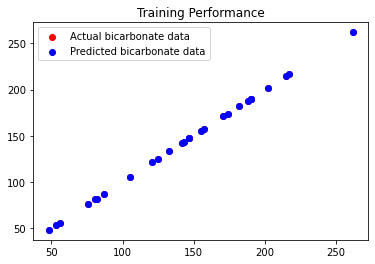

In [34]:
plt.scatter(X_train, y_train, color = 'red', label = 'Actual bicarbonate data')
plt.scatter(X_train, y_pred_train, color = 'blue', label = 'Predicted bicarbonate data')
plt.title('Training Performance')
plt.legend(loc = 2)
plt.show()


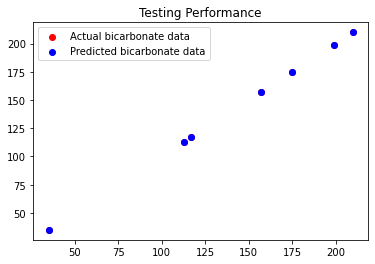

In [35]:
plt.scatter(X_test, y_test, color = 'red', label = 'Actual bicarbonate data')
plt.scatter(X_test, y_pred_test, color = 'blue', label = 'Predicted bicarbonate data')
plt.title('Testing Performance')
plt.legend(loc = 2)
plt.show()

# Error Metrics calculation

In [36]:
import math
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error


#Training Accuracies
rmse = math.sqrt(mean_squared_error(y_train, y_pred_train)) 
print('Root mean square error', rmse) 
mse = (mean_squared_error(y_train, y_pred_train)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_train, y_pred_train)
print('Mean absolute error', mae)

Root mean square error 9.744838835755859e-08
Mean square error 9.49618839348556e-15
Mean absolute error 7.129146247827387e-08


In [37]:
#Testing Accuracies
mse = math.sqrt(mean_squared_error(y_test, y_pred_test)) 
print('Root mean square error', mse) 
mse = (mean_squared_error(y_test, y_pred_test)) 
print('Mean square error', mse) 
mae=mean_absolute_error(y_test, y_pred_test)
print('Mean absolute error', mae)

Root mean square error 6.672049713513961e-08
Mean square error 4.451624737960173e-15
Mean absolute error 5.86185444311533e-08


# save model

In [31]:
import pickle
# Save the model
filename = 'model.pkl'
pickle.dump(pol_reg, open(filename, 'wb'))

# Deployment

In [39]:
user_ip=input('enter bicarbonate level')
level=np.array(float(user_ip))
level=level.reshape(-1,1)
level_features = poly_reg.fit_transform(level)
bicarbonate=pol_reg.predict(level_features)
print('salary of bicarbonate',salary)

enter bicarbonate level1
salary of bicarbonate [0.99999993]


# 

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=4)
model = pickle.load(open('model.pkl', 'rb'))

user_ip=input('enter bicarbonate level')
level=np.array(float(user_ip))
level=level.reshape(-1,1)
level_features = poly_reg.fit_transform(level)
bicarbonate=model.predict(level_features)
print('bicarbonate level',bicarbonate)

enter bicarbonate level1
bicarbonate level [0.99999993]
